# United Airlines Hackathon
## Data Analytics Project:  Analysizing Customer Call Data
### Authors: Aryan Kuhar and Unnat Bharol
###                       Delhi Technological University

In [618]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objs as go

In [619]:
data_calls = pd.read_csv("calls.csv")
data_calls.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [620]:
data_calls.shape

(71810, 7)

In [621]:
data_customers = pd.read_csv("customers.csv")
data_customers.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [622]:
data_customers.shape

(71810, 3)

In [623]:
data_reason = pd.read_csv("reason.csv")
data_reason.head()

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [624]:
data_reason.shape

(66653, 2)

In [625]:
data_sentiment = pd.read_csv("sentiment_statistics.csv")
data_sentiment.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [626]:
data_sentiment.shape

(71810, 6)

In [627]:
merged_df_1 = pd.merge(data_calls, data_customers, on='customer_id')
merged_df_2 = pd.merge(merged_df_1, data_reason, on='call_id')
merged_df_3 = pd.merge(merged_df_2, data_sentiment, on='call_id')
merged_df_3.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,Voluntary Cancel,963118,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN,Booking,519057,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN,IRROPS,158319,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,Upgrade,488324,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,Seating,721730,neutral,polite,-0.05,0.35


In [628]:
data_calls['call_start_datetime'] = pd.to_datetime(data_calls['call_start_datetime'], format='%m/%d/%Y %H:%M')
data_calls['call_end_datetime'] = pd.to_datetime(data_calls['call_end_datetime'], format='%m/%d/%Y %H:%M')
data_calls['agent_assigned_datetime'] = pd.to_datetime(data_calls['agent_assigned_datetime'], format='%m/%d/%Y %H:%M')

data_calls['call_time_dt'] = data_calls['call_end_datetime'] - data_calls['call_start_datetime']
data_calls['answer_speed_dt'] = data_calls['agent_assigned_datetime'] - data_calls['call_start_datetime']
data_calls['handle_time_dt'] = data_calls['call_end_datetime'] - data_calls['agent_assigned_datetime']

data_calls['handle_time'] = data_calls['handle_time_dt'].dt.total_seconds() / 60
data_calls['handle_time'] = data_calls['handle_time'].astype(int)

data_calls['answer_speed'] = data_calls['answer_speed_dt'].dt.total_seconds() / 60
data_calls['answer_speed'] = data_calls['answer_speed'].astype(int)

data_calls['call_time'] = data_calls['call_time_dt'].dt.total_seconds() / 60
data_calls['call_time'] = data_calls['call_time'].astype(int)

call_time_df = data_calls[['call_id', 'call_time', 'answer_speed', 'handle_time']]
call_time_df.head()

merged_df = pd.merge(merged_df_3, call_time_df, on='call_id')
merged_df.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,call_time,answer_speed,handle_time
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,Voluntary Cancel,963118,neutral,angry,-0.04,0.39,38,7,31
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN,Booking,519057,calm,neutral,0.02,0.35,15,3,12
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN,IRROPS,158319,neutral,polite,-0.13,0.32,27,8,19
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,Upgrade,488324,neutral,frustrated,-0.20,0.20,12,5,7
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,Seating,721730,neutral,polite,-0.05,0.35,19,10,9


In [629]:
merged_df.shape

(66653, 18)

## Analyszing AHT and AST

In [630]:
total_handle_time = call_time_df['handle_time'].sum()
total_answer_speed = call_time_df['answer_speed'].sum()
total_call_time = call_time_df['call_time'].sum()

number_of_calls = call_time_df.shape[0]

AHT = total_handle_time / number_of_calls
print("Average handle time =", AHT, "minutes")

AST = total_answer_speed / number_of_calls
print("Average answer speed =", AST, "minutes")

average_call_time = total_call_time / number_of_calls
print("Average call time =", average_call_time, "minutes")

Average handle time = 11.61747667455786 minutes
Average answer speed = 7.284458988998747 minutes
Average call time = 18.901935663556607 minutes


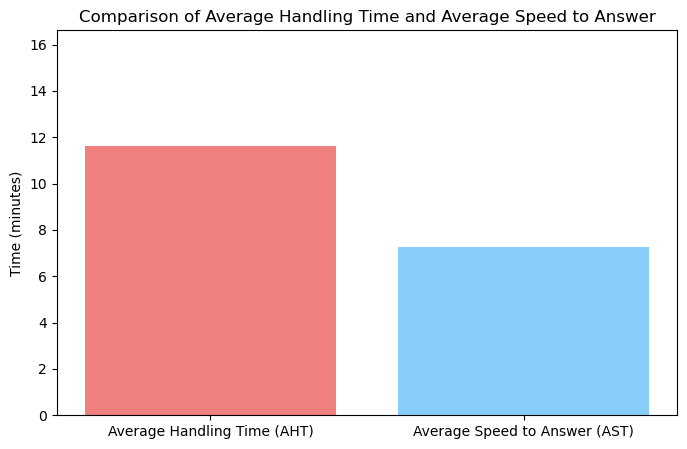

In [631]:

labels = ['Average Handling Time (AHT)', 'Average Speed to Answer (AST)']
values = [AHT, AST]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['lightcoral', 'lightskyblue'])
plt.title('Comparison of Average Handling Time and Average Speed to Answer')
plt.ylabel('Time (minutes)')
plt.ylim(0, max(values) + 5) 
plt.show()

In [632]:
#Changing agent tone from alphabetical to numerical value
#Polite to 0
#Calm to 1
#Neutral to 2
#Frustrated to 3
#Angry to 4
merged_df['agent_tone'].replace('polite',0,inplace=True)
merged_df['agent_tone'].replace('calm',1,inplace=True)
merged_df['agent_tone'].replace('neutral',2,inplace=True)
merged_df['agent_tone'].replace('frustrated',3,inplace=True)
merged_df['agent_tone'].replace('angry',4,inplace=True)

In [633]:
#Changing Customer tone from alphabetical to numerical value
#Polite to 0
#Calm to 1
#Neutral to 2
#Frustrated to 3
#Angry to 4
merged_df['customer_tone'].replace('polite',0,inplace=True)
merged_df['customer_tone'].replace('calm',1,inplace=True)
merged_df['customer_tone'].replace('neutral',2,inplace=True)
merged_df['customer_tone'].replace('frustrated',3,inplace=True)
merged_df['customer_tone'].replace('angry',4,inplace=True)

In [634]:
#Changing Primary call reason from alphabetical to numerical value

merged_df['primary_call_reason'].replace('Voluntary Cancel',0,inplace=True)
merged_df['primary_call_reason'].replace('Voluntary  Cancel',0,inplace=True)
merged_df['primary_call_reason'].replace('Voluntary Cancel  ',0,inplace=True)
merged_df['primary_call_reason'].replace('Booking',1,inplace=True)
merged_df['primary_call_reason'].replace('Booking  ',1,inplace=True)
merged_df['primary_call_reason'].replace('IRROPS',2,inplace=True)
merged_df['primary_call_reason'].replace('IRROPS  ',2,inplace=True)
merged_df['primary_call_reason'].replace('Upgrade',3,inplace=True)
merged_df['primary_call_reason'].replace('Upgrade  ',3,inplace=True)
merged_df['primary_call_reason'].replace('Seating',4,inplace=True)
merged_df['primary_call_reason'].replace('Mileage Plus',5,inplace=True)
merged_df['primary_call_reason'].replace('Mileage   Plus',5,inplace=True)
merged_df['primary_call_reason'].replace('Mileage  Plus',5,inplace=True)
merged_df['primary_call_reason'].replace('Mileage Plus  ',5,inplace=True)
merged_df['primary_call_reason'].replace('Checkout',6,inplace=True)
merged_df['primary_call_reason'].replace('Checkout  ',6,inplace=True)
merged_df['primary_call_reason'].replace('Communications',7,inplace=True)
merged_df['primary_call_reason'].replace('Communications  ',7,inplace=True)
merged_df['primary_call_reason'].replace('Schedule Change',8,inplace=True)
merged_df['primary_call_reason'].replace('Schedule Change',8,inplace=True)
merged_df['primary_call_reason'].replace('Schedule Change ',8,inplace=True)
merged_df['primary_call_reason'].replace('Schedule Change  ',8,inplace=True)
merged_df['primary_call_reason'].replace('Disability',9,inplace=True)
merged_df['primary_call_reason'].replace('Disability',9,inplace=True)
merged_df['primary_call_reason'].replace('Disability ',9,inplace=True)
merged_df['primary_call_reason'].replace('Disability  ',9,inplace=True)
merged_df['primary_call_reason'].replace('Voluntary Change',10,inplace=True)
merged_df['primary_call_reason'].replace('Voluntary  Change',10,inplace=True)
merged_df['primary_call_reason'].replace('Voluntary   Change',10,inplace=True)
merged_df['primary_call_reason'].replace('Voluntary Change  ',10,inplace=True)
merged_df['primary_call_reason'].replace('Products and Services',11,inplace=True)
merged_df['primary_call_reason'].replace('Products & Services',11,inplace=True)
merged_df['primary_call_reason'].replace('Products and Services  ',11,inplace=True)
merged_df['primary_call_reason'].replace('Post Flight',12,inplace=True)
merged_df['primary_call_reason'].replace('Post-Flight',12,inplace=True)
merged_df['primary_call_reason'].replace('Post-Flight  ',12,inplace=True)
merged_df['primary_call_reason'].replace('Seating',13,inplace=True)
merged_df['primary_call_reason'].replace('Seating  ',13,inplace=True)
merged_df['primary_call_reason'].replace('Check In',14,inplace=True)
merged_df['primary_call_reason'].replace('Check-In',14,inplace=True)
merged_df['primary_call_reason'].replace('Check-In  ',14,inplace=True)
merged_df['primary_call_reason'].replace('Other  Topics',15,inplace=True)
merged_df['primary_call_reason'].replace('Other Topics',15,inplace=True)
merged_df['primary_call_reason'].replace('Other Topics  ',15,inplace=True)
merged_df['primary_call_reason'].replace('Digital Support',16,inplace=True)
merged_df['primary_call_reason'].replace('Digital  Support',16,inplace=True)
merged_df['primary_call_reason'].replace('Digital   Support',16,inplace=True)
merged_df['primary_call_reason'].replace('Digital Support  ',16,inplace=True)
merged_df['primary_call_reason'].replace('Unaccompanied Minor',17,inplace=True)
merged_df['primary_call_reason'].replace('Unaccompanied Minor  ',17,inplace=True)
merged_df['primary_call_reason'].replace(' Baggage',18,inplace=True)
merged_df['primary_call_reason'].replace('Baggage  ',18,inplace=True)
merged_df['primary_call_reason'].replace('Baggage',18,inplace=True)
merged_df['primary_call_reason'].replace('Baggage  ',18,inplace=True)
merged_df['primary_call_reason'].replace('Baggage  ',18,inplace=True)
merged_df['primary_call_reason'].replace('Traveler Updates',19,inplace=True)
merged_df['primary_call_reason'].replace('Traveler Updates  ',19,inplace=True)
merged_df['primary_call_reason'].replace('Traveler   Updates',19,inplace=True)
merged_df['primary_call_reason'].replace('Traveler  Updates',19,inplace=True)
merged_df['primary_call_reason'].replace('ETC',20,inplace=True)
merged_df['primary_call_reason'].replace('ETC  ',20,inplace=True)



## Creating a bar chart of importance
Creates bar chart for different attributes which shows importance level in determining handle time.

In [647]:
merged_df_drop = merged_df.dropna()
x = merged_df_drop[['primary_call_reason', 'agent_tone', 'customer_tone', 'average_sentiment', 'silence_percent_average']]
y = merged_df_drop['handle_time']


In [645]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [646]:
rf = RandomForestClassifier(random_state=42).fit(x_train, y_train)
y_prob = rf.predict_proba(x_test)[:, 1]


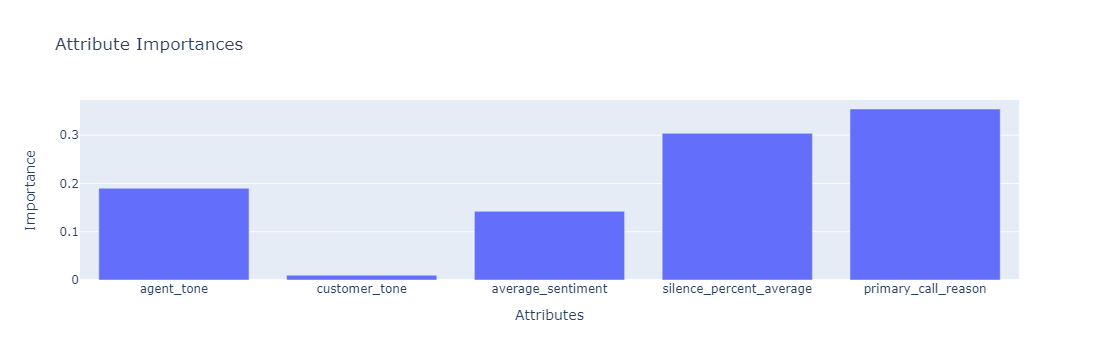

In [648]:
importances = rf.feature_importances_

# Create a bar chart of importances of different attributes
fig = go.Figure(data=go.Bar(x=x_aht.columns, y=importances))
fig.update_layout(title="Attribute Importances", xaxis_title="Attributes", yaxis_title="Importance")
fig.show()

## Plotting AHT and AST by time of day

In [649]:
from scipy.interpolate import make_interp_spline


In [650]:
merged_df['hour_recieved'] = data_calls['call_start_datetime'].dt.hour  

average_handle_time_by_hour = merged_df.groupby('hour_recieved')['handle_time'].mean()


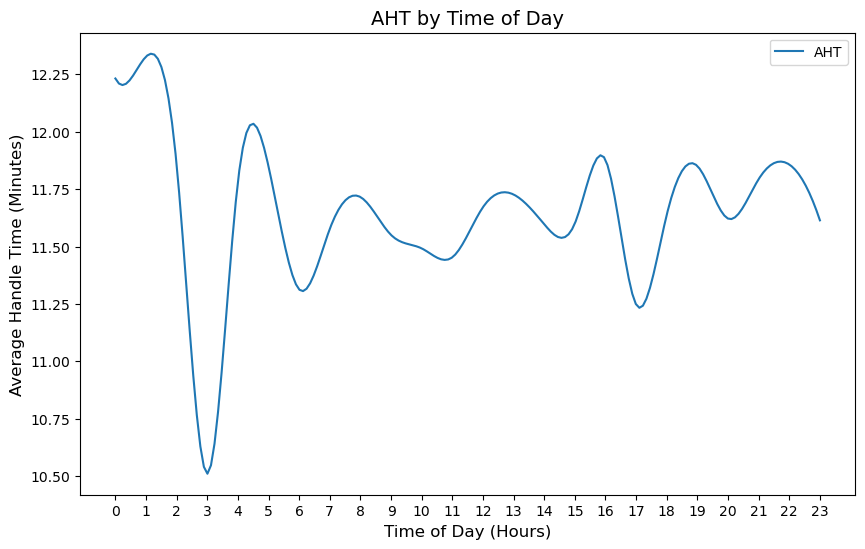

In [651]:
x_smooth = np.linspace(average_handle_time_by_hour.index.min(), average_handle_time_by_hour.index.max(), 200)

# Apply spline interpolation
spline = make_interp_spline(average_handle_time_by_hour.index, average_handle_time_by_hour.values)
y_smooth = spline(x_smooth)

plt.figure(figsize=(10, 6))

# Line plot of spline-smoothed data
plt.plot(x_smooth, y_smooth, label='AHT')

# Labels and title
plt.title('AHT by Time of Day', fontsize=14)
plt.xlabel('Time of Day (Hours)', fontsize=12)
plt.ylabel('Average Handle Time (Minutes)', fontsize=12)
plt.xticks(range(0, 24))

# Show the plot
plt.legend()
plt.show()

In [652]:
merged_df['hour_recieved'] = data_calls['call_start_datetime'].dt.hour  

average_answer_speed_by_hour = merged_df.groupby('hour_recieved')['answer_speed'].mean()


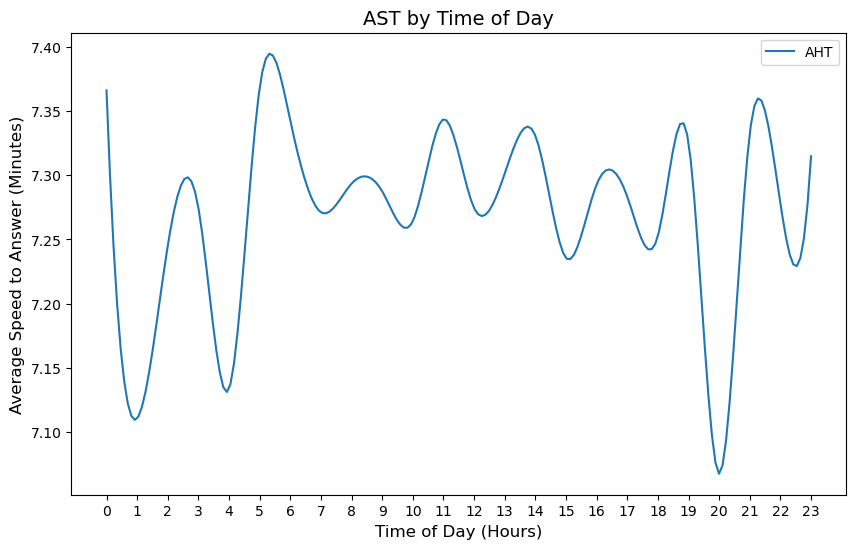

In [653]:
x_smooth = np.linspace(average_answer_speed_by_hour.index.min(), average_answer_speed_by_hour.index.max(), 200)

# Apply spline interpolation
spline = make_interp_spline(average_answer_speed_by_hour.index, average_answer_speed_by_hour.values)
y_smooth = spline(x_smooth)

plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, label='AHT')

plt.title('AST by Time of Day', fontsize=14)
plt.xlabel('Time of Day (Hours)', fontsize=12)
plt.ylabel('Average Speed to Answer (Minutes)', fontsize=12)
plt.xticks(range(0, 24))

plt.legend()
plt.show()

## Plotting for various analysis

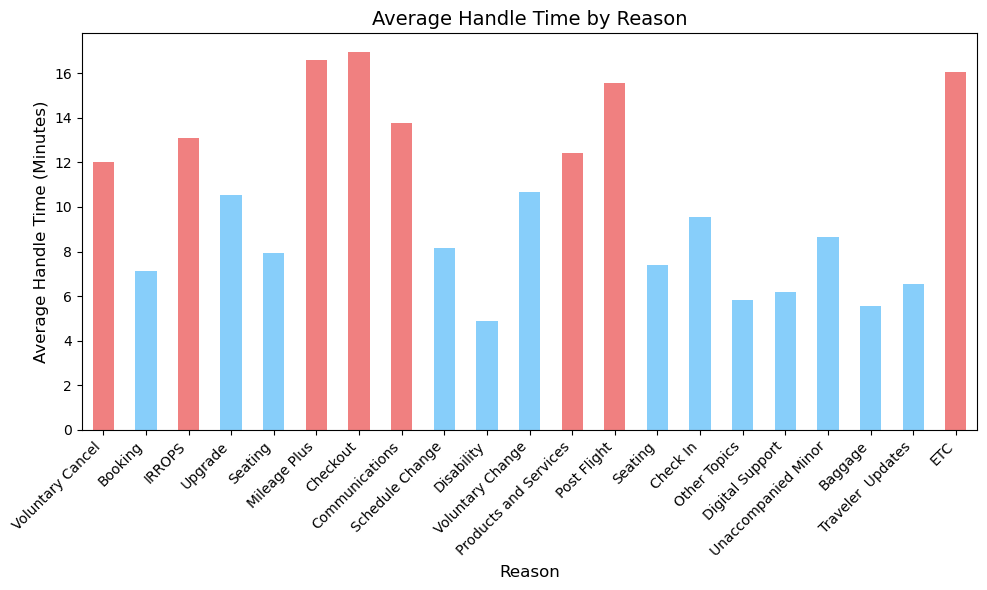

In [654]:
average_handle_time_by_reason = merged_df.groupby('primary_call_reason')['handle_time'].mean()

# Plot the data
plt.figure(figsize=(10, 6))

colors = ['lightskyblue' if avg < AHT else 'lightcoral' for avg in average_handle_time_by_reason]

# Bar plot of average call time by reason
average_handle_time_by_reason.plot(kind='bar', color=colors)

# Labels and title
plt.title('Average Handle Time by Reason', fontsize=14)
plt.xlabel('Reason', fontsize=12)
plt.ylabel('Average Handle Time (Minutes)', fontsize=12)

custom_labels = ['Voluntary Cancel', 'Booking', 'IRROPS', 'Upgrade','Seating', 'Mileage Plus', 'Checkout', 'Communications', 'Schedule Change', 'Disability', 'Voluntary Change', 'Products and Services', 'Post Flight', 'Seating', 'Check In', 'Other Topics', 'Digital Support', 'Unaccompanied Minor', 'Baggage', 'Traveler  Updates','ETC']  # Add corresponding custom labels

# Set x-axis tick labels
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

Most frequent call reason: 2.0 (AHT: 13.09)
Least frequent call reason: 17.0 (AHT: 8.65)
Percentage difference in AHT: 51.21%


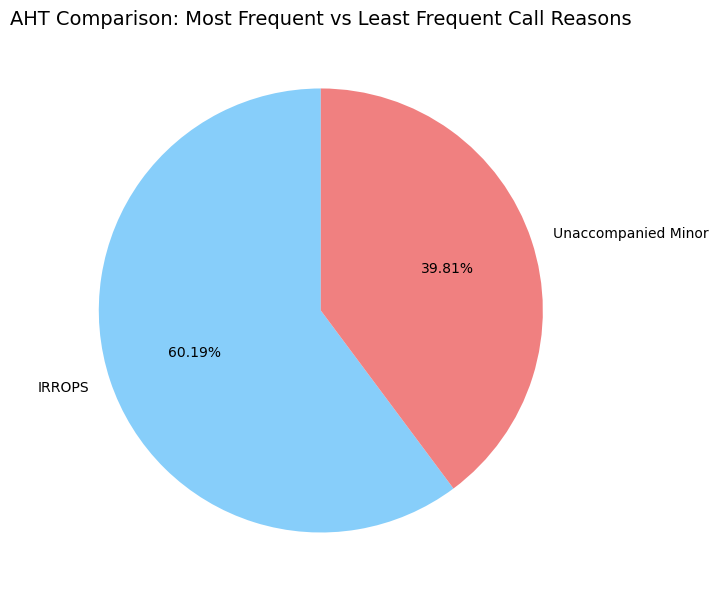

In [655]:
grouped_data = merged_df.groupby('primary_call_reason').agg(
    call_count=('primary_call_reason', 'size'),  # count frequency of each call reason
    avg_aht=('handle_time', 'mean')  # calculate mean AHT for each reason
).reset_index()

# Find the most frequent and least frequent call reasons
most_frequent_reason = grouped_data.loc[grouped_data['call_count'].idxmax()]
least_frequent_reason = grouped_data.loc[grouped_data['call_count'].idxmin()]

# Extract the average handling times for the most and least frequent reasons
aht_most_frequent = most_frequent_reason['avg_aht']
aht_least_frequent = least_frequent_reason['avg_aht']

# Calculate the percentage difference
percentage_difference = ((aht_most_frequent - aht_least_frequent) / aht_least_frequent) * 100

# Print the results
print(f"Most frequent call reason: {most_frequent_reason['primary_call_reason']} (AHT: {aht_most_frequent:.2f})")
print(f"Least frequent call reason: {least_frequent_reason['primary_call_reason']} (AHT: {aht_least_frequent:.2f})")
print(f"Percentage difference in AHT: {percentage_difference:.2f}%")

aht_values = [aht_most_frequent, aht_least_frequent]

labels = [ 'IRROPS', 'Unaccompanied Minor',]
# Plot the pie chart
plt.figure(figsize=(7, 7))

# Pie chart with percentage displayed
plt.pie(
    aht_values, 
    labels=labels, 
    autopct='%1.2f%%',  # show percentages
    colors=['lightskyblue', 'lightcoral'],  # color for each slice
    startangle=90,  # rotate the start of the pie chart
)

# Title for the pie chart
plt.title('AHT Comparison: Most Frequent vs Least Frequent Call Reasons', fontsize=14)

# Show the pie chart
plt.tight_layout()
plt.show()

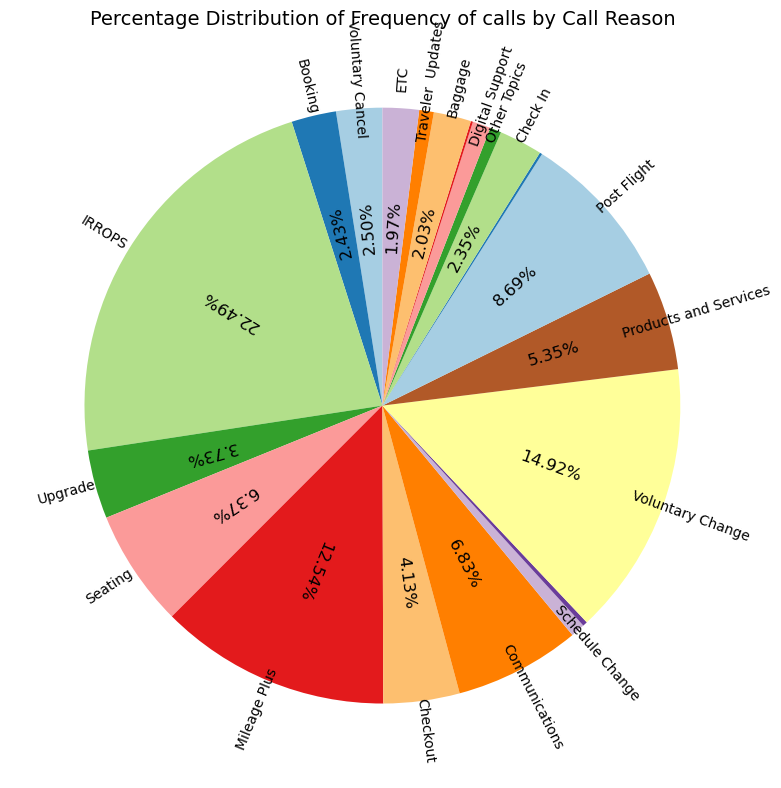

In [656]:
grouped_data = merged_df.groupby('primary_call_reason').agg(
    total_aht=('handle_time', 'sum'),  # calculate total AHT for each reason
    call_count=('primary_call_reason', 'size')         # count the number of calls for each reason
).reset_index()

# Calculate the percentage of total handling time for each reason
total_aht_sum = grouped_data['total_aht'].sum()
grouped_data['percent_aht'] = (grouped_data['total_aht'] / total_aht_sum) * 100

custom_labels = {
    reason: reason for reason in grouped_data['primary_call_reason']  # You can adjust this dictionary to rename reasons
}

grouped_data['primary_call_reason'] = grouped_data['primary_call_reason'].replace(custom_labels)

# Step 5: Data for the pie chart 
aht_values = grouped_data['percent_aht']
custom_labels = ['Voluntary Cancel', 'Booking', 'IRROPS', 'Upgrade','Seating', 'Mileage Plus', 'Checkout', 'Communications', 'Schedule Change', ' ', 'Voluntary Change', 'Products and Services', 'Post Flight', ' ', 'Check In', 'Other Topics', 'Digital Support', ' ', 'Baggage', 'Traveler  Updates','ETC']  # Add corresponding custom labels

def autopct_format(pct):
    return f'{pct:.2f}%' if pct >= 1.75 else ''


#  Plot the pie chart
fig, ax = plt.subplots(figsize=(8, 8))

# Pie chart showing the percentage of handling time for each call reason
wedges, texts, autotexts = ax.pie(aht_values, 
    labels=custom_labels, 
    autopct=autopct_format, 
    startangle=90, 
    colors=plt.cm.Paired.colors,  
)

for i, text in enumerate(texts):
    angle = (wedges[i].theta2 + wedges[i].theta1) / 2 
    x, y = np.cos(np.deg2rad(angle)), np.sin(np.deg2rad(angle))  
    if x < 0:
        angle += 180  
    text.set_rotation(angle)
    text.set_va('center')  
    text.set_ha('center') 

for i, autotext in enumerate(autotexts):
    autotext.set_color('black') 
    autotext.set_fontsize(12) 

    # Tilt the percentage labels
    angle = (wedges[i].theta2 + wedges[i].theta1) / 2 
    autotext.set_rotation(angle) 

# Title for the pie chart
plt.title('Percentage Distribution of Frequency of calls by Call Reason', fontsize=14)

# Show the pie chart
plt.tight_layout()
plt.show()

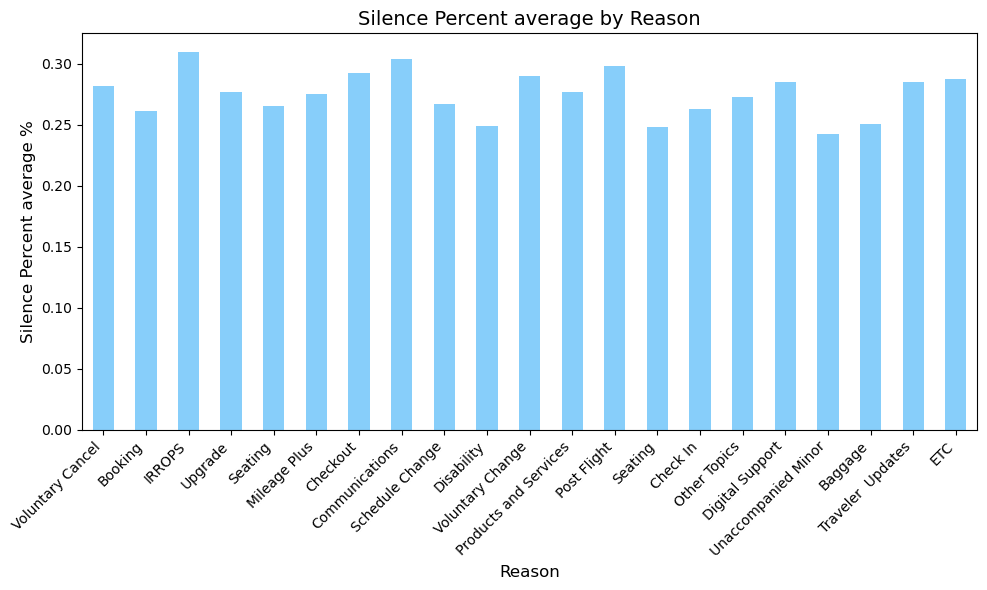

In [657]:
silence_percent_average_by_reason = merged_df.groupby('primary_call_reason')['silence_percent_average'].mean()

plt.figure(figsize=(10, 6))

# Bar plot of average call time by reason
silence_percent_average_by_reason.plot(kind='bar', color='lightskyblue')

# Labels and title
plt.title('Silence Percent average by Reason', fontsize=14)
plt.xlabel('Reason', fontsize=12)
plt.ylabel('Silence Percent average %', fontsize=12)

custom_labels = ['Voluntary Cancel', 'Booking', 'IRROPS', 'Upgrade','Seating', 'Mileage Plus', 'Checkout', 'Communications', 'Schedule Change', 'Disability', 'Voluntary Change', 'Products and Services', 'Post Flight', 'Seating', 'Check In', 'Other Topics', 'Digital Support', 'Unaccompanied Minor', 'Baggage', 'Traveler  Updates','ETC']  # Add corresponding custom labels

plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

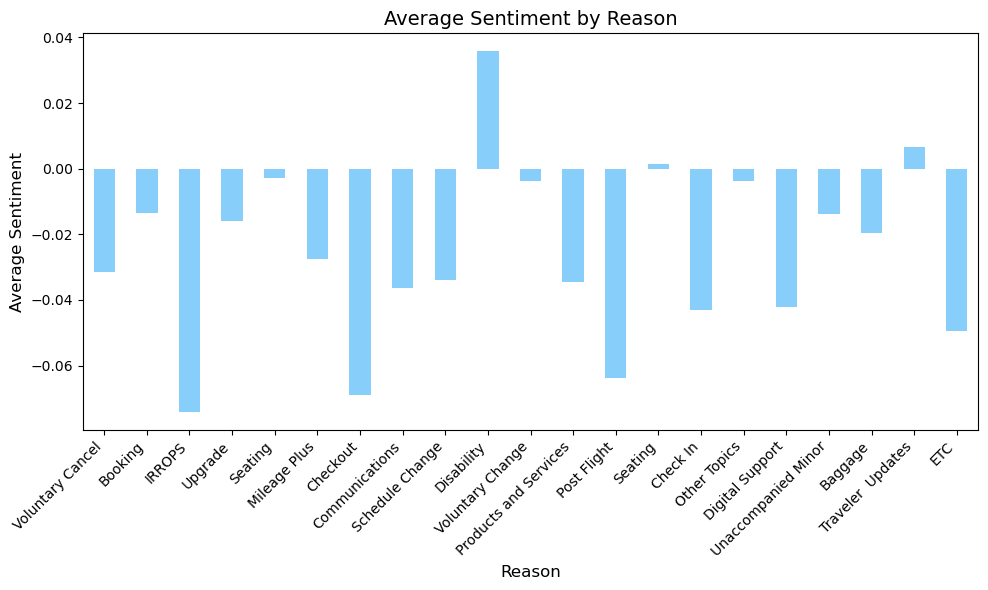

In [658]:
average_sentiment_by_reason = merged_df.groupby('primary_call_reason')['average_sentiment'].mean()

plt.figure(figsize=(10, 6))

# Bar plot of average call time by reason
average_sentiment_by_reason.plot(kind='bar', color='lightskyblue')

# Labels and title
plt.title('Average Sentiment by Reason', fontsize=14)
plt.xlabel('Reason', fontsize=12)
plt.ylabel('Average Sentiment', fontsize=12)

custom_labels = ['Voluntary Cancel', 'Booking', 'IRROPS', 'Upgrade','Seating', 'Mileage Plus', 'Checkout', 'Communications', 'Schedule Change', 'Disability', 'Voluntary Change', 'Products and Services', 'Post Flight', 'Seating', 'Check In', 'Other Topics', 'Digital Support', 'Unaccompanied Minor', 'Baggage', 'Traveler  Updates','ETC']  # Add corresponding custom labels

plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

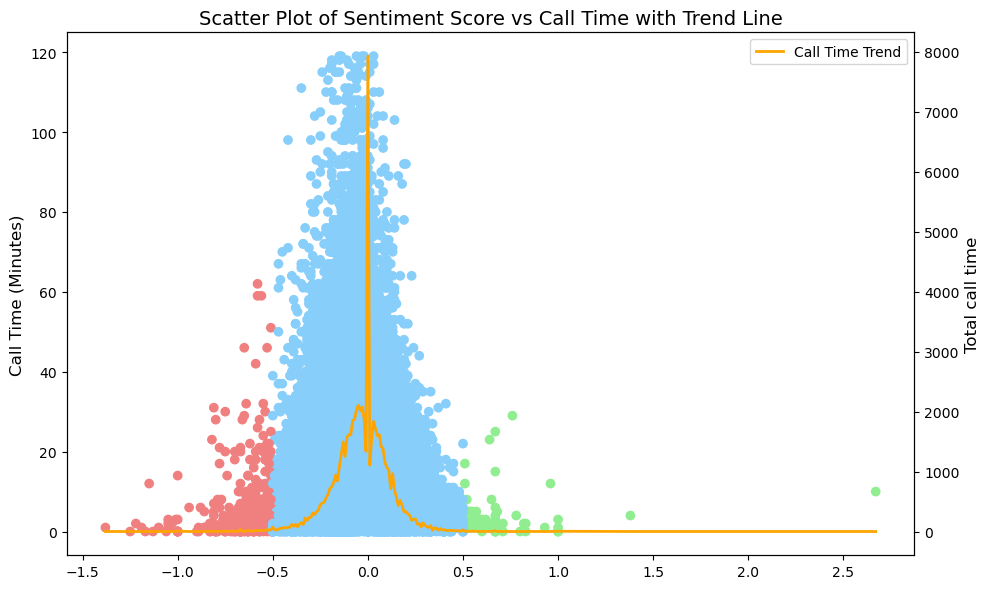

In [659]:
merged_df = merged_df.dropna(subset=['average_sentiment', 'handle_time'])

merged_df['handle_time'] = pd.to_numeric(merged_df['handle_time'], errors='coerce')
merged_df['average_sentiment'] = pd.to_numeric(merged_df['average_sentiment'], errors='coerce')


merged_df = merged_df.dropna(subset=['handle_time', 'average_sentiment'])


# Red for sentiment < -0.5, Green for sentiment > 0.5, Blue for sentiment in between
colors = ['lightcoral' if score < -0.5 else 'lightgreen' if score > 0.5 else 'lightskyblue' for score in merged_df['average_sentiment']]

# Step 5: Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot of sentiment score vs call time with color coding
plt.scatter(merged_df['average_sentiment'], merged_df['handle_time'], color=colors, label='Data Points')

plt.ylabel('Call Time (Minutes)', fontsize=12)
sentiment_grouped = merged_df.groupby('average_sentiment').size()


plt.twinx()  

# Plotting the sentiment score vs call count
plt.plot(sentiment_grouped.index, sentiment_grouped.values, color='orange', linewidth=2, label='Call Time Trend')
plt.ylabel('Total call time', fontsize=12)



# Labels and title
plt.title('Scatter Plot of Sentiment Score vs Call Time with Trend Line', fontsize=14)
plt.xlabel('Sentiment Score', fontsize=12)


plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

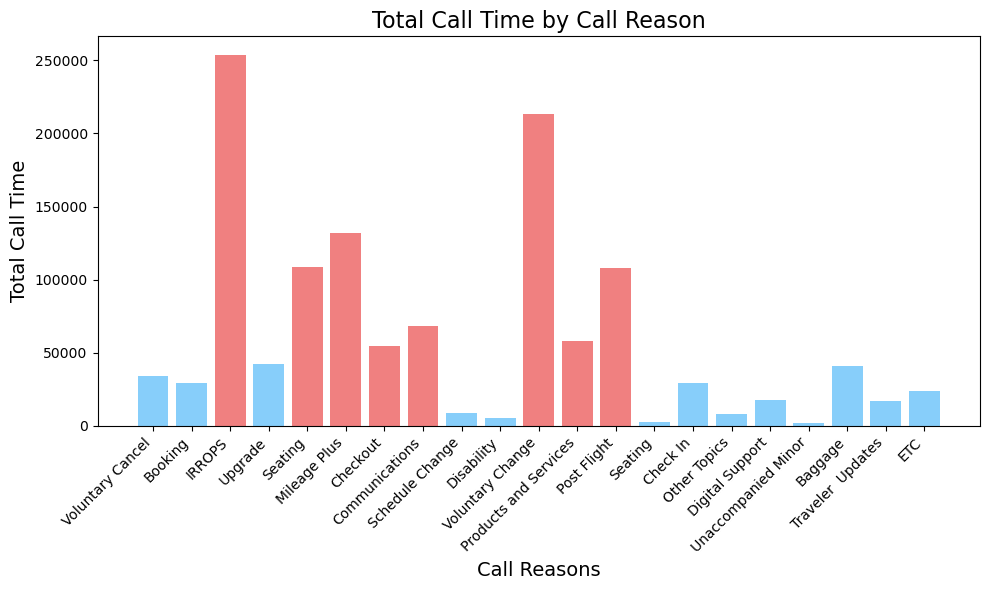

In [660]:
total_call_time = merged_df.groupby('primary_call_reason')['call_time'].sum().reset_index()
total_call_time = total_call_time.sort_values(by='call_time', ascending=False)

custom_labels = ['Voluntary Cancel', 'Booking', 'IRROPS', 'Upgrade','Seating', 'Mileage Plus', 'Checkout', 'Communications', 'Schedule Change', 'Disability', 'Voluntary Change', 'Products and Services', 'Post Flight', 'Seating', 'Check In', 'Other Topics', 'Digital Support', 'Unaccompanied Minor', 'Baggage', 'Traveler  Updates','ETC']  # Add corresponding custom labels

colors = ['lightcoral' if time > 50000 else 'lightskyblue' for time in total_call_time['call_time']]


# Plotting the total call time for each reason
plt.figure(figsize=(10, 6))
plt.bar(total_call_time['primary_call_reason'], total_call_time['call_time'], color=colors)

plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=45, ha='right')


# Adding labels and title
plt.xlabel('Call Reasons', fontsize=14)
plt.ylabel('Total Call Time', fontsize=14)
plt.title('Total Call Time by Call Reason', fontsize=16)
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()  
plt.show()

## Predicting Call Reasons
Use 'test.csv' to obtain call id's then use these id's to find their respective call transcripts.
Then use keywords to predict reason of every call id using their transcripts.
Finally updating 'test_predict.csv' with call reasons.

In [661]:
data_test = pd.read_csv("test.csv")
test_df = pd.merge(data_test, data_calls, on='call_id')
call_reason_predict = test_df[['call_id', 'call_transcript']]

In [662]:
reason_keywords = {
    'Voluntary Cancel': [
        'voluntary cancellation', 'cancel flight', 'cancellation request', 
        'change my mind', 'not traveling', 'need to cancel', 'decided not to go'
    ],
    'Booking': [
        'booking details', 'delayed due to weather issues',
        'new flight booking', 'make a new reservation', 'double check my booking details',
        'new online booking', 'new booking', 'new booking confirmation', 'payment for booking'
    ],
    'IRROPS': [
        'my flight got delayed', 'weather issues',
        'irregular operations', 'flight disruption', 'flight delay', 'flight cancellation', 
        'diverted flight', 'operational issues', 'schedule disruption', 'irregular schedule'
    ],
    'Upgrade': [
        'upgrade request', 'upgrade flight', 'business class upgrade', 'first class upgrade', 
        'upgrade availability', 'complimentary upgrade', 'mileage upgrade', 'upgrade fee'
    ],
    'Seating': [
        'seat assignment', ' better seat', 'window', 'upgrade my seat',
        'seat assignment', 'seat selection', 'preferred seat', 'change seat', 
        'extra legroom', 'window seat', 'aisle seat', 'seating arrangement', 'seat map'
    ],
    'Mileage Plus': [
        'mileage plus', 'loyalty program', 'miles', 'points', 
        'redeem miles', 'membership status', 'earning miles', 'points balance'
    ],
    'Checkout': [
        'checkout process', 'finalize booking', 'payment options', 'checkout page', 
        'billing information', 'confirm payment', 'complete booking', 'payment confirmation'
    ],
    'Communications': [
        "I'm really worried it might get cancelled or delayed", 
        'communicated better', ' lack of information', 'keeping customers informed',
        'communication preferences', 'email updates', 'text alerts', 'contact methods', 
        'customer notifications', 'travel updates', 'messages', 'communication issues'
    ],
    'Schedule Change': [
        'it got delayed', 'It was delayed like', 'change to the schedule',
        'rescheduled', 'They have me rescheduled', "worried it's going to get delayed or canceled",
        'schedule change', 'flight reschedule', 'change of itinerary', 'altered flight schedule', 
        'new flight time', 'itinerary change', 'flight updates', 'notify schedule change'
    ],
    'Disability': [
        'disability assistance', 'wheelchair service', 'special assistance', 'accessible travel', 
        'medical needs', 'assistance for disabled', 'support for disabilities', 'mobility assistance'
    ],
    'Voluntary Change': [
        'change the date', 'I need to change it', 'Delays and changes'
        'change it to an earlier flight', 'switch you over', 'change the departure time',
        'change it to', 'I need to change my flight', 'I need to postponed', ' change the date',
        'change the date of my upcoming flight', 'I need to move it to', 'switch me over',
        'change my flight', 'voluntary change', 'change reservation', 'modify booking', 'change my return flight',
        'adjust itinerary', 'flexible travel', 'reschedule', 'change plans', 'change the date', 'change the return'
    ],
    'Products and Services': [
        'products and services', 'in-flight services', 'ancillary services', 'travel accessories', 
        'meal options', 'entertainment services', 'baggage services', 'premium services'
    ],
    'Post Flight': [
        'post-flight survey', 'flight feedback', 'after flight', 'customer experience', 
        'complaints after flight', 'post travel', 'flight review', 'post-flight services'
    ],
    'Seating (duplicate entry)': [
        'seat assignment', 'seat selection', 'preferred seat', 'change seat', 
        'extra legroom', 'window seat', 'aisle seat', 'seating arrangement', 'seat map'
    ],
    'Check In': [
        'check-in', 'online check-in', 'mobile boarding pass', 'check-in status', 
        'check-in process', 'boarding time', 'self-service check-in', 'check-in counter'
    ],
    'Other Topics': [
        'general inquiry', 'other questions', 'not listed', 'miscellaneous', 
        'general information', 'feedback', 'queries not specified', 'other issues'
    ],
    'Digital Support': [
        'app issues', 'website navigation', 'digital support', 'technical assistance', 
        'online help', 'website problems', 'account management', 'mobile app support'
    ],
    'Unaccompanied Minor': [
        'unaccompanied minor', 'minor traveling alone', 'child travel assistance', 
        'special services for minors', 'unaccompanied minor policy', 'age restrictions', 
        'escort service', 'children travel'
    ],
    'Baggage': [
        'baggage claim', 'lost luggage', 'damaged baggage', 'baggage policy', 
        'baggage allowance', 'excess baggage', 'missing baggage', 'baggage fees'
    ],
    'Traveler Updates': [
        'traveler updates', 'travel alerts', 'flight updates', 'safety notifications', 
        'important messages', 'travel advisories', 'updates on flights', 'alerts'
    ],
    'ETC': [
        'etc', 'other topics', 'additional questions', 'etcetera', 
        'not specified', 'extra', 'other inquiries', 'various questions'
    ],
    'Complain': [
        'complain', 'bad experience', 'food was awful', "I'm calling to complain",'missed an important meeting',
        '*sighs angrily*', "I'm calling to complain about my recent flight", 'service was absolutely terrible',
        'poor experience', 
    ],
}

In [663]:

# Function to predict call reason based on keywords
def predict_reason(transcript):
    for reason, keywords in reason_keywords.items():
        if any(keyword in transcript.lower() for keyword in keywords):
            return reason
    return 'Other'  # Return 'Other' if no keywords match

# Apply the prediction function to create a new 'reasons' column
call_reason_predict['reasons'] = call_reason_predict['call_transcript'].apply(predict_reason)

print(call_reason_predict[['call_id','call_transcript', 'reasons']].head())
test_updated = call_reason_predict[['call_id', 'reasons']]
# Save the updated DataFrame to a new CSV file
test_updated.to_csv('test_predict.csv', index=False)

C:\Users\Aryan Kuhar\AppData\Local\Temp\ipykernel_23500\747339929.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



      call_id                                    call_transcript  \
0  7732610078  \n\nAgent: Thank you for calling United Airlin...   
1  2400299738  \n\nAgent: Thank you for calling United Airlin...   
2  6533095063  \n\nAgent: Thank you for calling United Airlin...   
3  7774450920  \n\nAgent: Thank you for calling United Airlin...   
4  9214147168  \n\nAgent: Thank you for calling United Airlin...   

            reasons  
0  Voluntary Change  
1          Complain  
2   Schedule Change  
3    Communications  
4      Mileage Plus  
